***Q1) Retail Company Scenario***
Company: Walmart
Topic: Sales Data Analysis

Calculate the total and average monthly sales.

Identify which department had the highest average sales during holidays.

Find the store with the most consistent sales (least variance).

***Q2)🔹 E-Commerce Scenario***
Company: Amazon
Topic: Product Reviews Analysis
Question:

Amazon wants to analyze customer feedback for its electronics products. Given a dataset with Product_ID, Rating, Review_Text, Review_Date, use Pandas and basic Python to:

Calculate average rating per product.

Identify the top 5 products with the most reviews.

Use NumPy to calculate the standard deviation of ratings.

What statistical measure would help detect whether most ratings are skewed (positively or negatively)?

***Q3)🔹 Finance Company Scenario***
Company: JPMorgan Chase
Topic: Customer Transactions
Question:

Analyze customer transactions. Given columns Customer_ID, Transaction_Date, Amount, Category, write code to:

Compute the total spend per customer using Pandas.

Use NumPy to find the percentile (25th, 50th, 75th) of all transaction amounts.

Use basic Python to count how many customers have more than 10 transactions.

Perform a statistical test to see if the average transaction amount differs between two categories.

***Q4)🔹 Healthcare Company Scenario***
Company: CVS Health
Topic: Patient Visit Logs
Question:

Analyze patient visit logs from a clinic. Data columns: Patient_ID, Visit_Date, Diagnosis, Cost, Follow_Up.
Tasks:

Calculate average and median cost per diagnosis.

Use NumPy to determine if the distribution of costs is normal.

Find the diagnosis with the highest variability in cost.

Create a time series of monthly visits.

***Q5)🔹 Food Delivery Company Scenario***
Company: Zomato
Topic: Order and Rating Analysis
Question:

Zomato wants insights from their order data. Data includes Order_ID, Restaurant_ID, Delivery_Time, Order_Value, Rating.
Tasks:

Calculate the average delivery time per restaurant.

Use Pandas to find the correlation between delivery time and rating.

Use NumPy to calculate z-scores for delivery times and identify outliers.

What statistical metric would help you judge customer satisfaction best?

Q1) Retail Company Scenario
Company: Walmart
Topic: Sales Data Analysis

Calculate the total and average monthly sales.

Identify which department had the highest average sales during holidays.

Find the store with the most consistent sales (least variance).


In [277]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"C:\Users\91709\OneDrive\Pictures\Desktop\retail_sales_data.csv")
df

,Date,Store_ID,Department,Sales,Holiday_Flag
0,01-01-2024,4,Electronics,26051.99,0
1,02-01-2024,5,Groceries,19243.82,0
2,03-01-2024,3,Electronics,18127.39,0
3,04-01-2024,5,Clothing,13543.92,0
4,05-01-2024,5,Clothing,16172.45,0
...,...,...,...,...,...
175,24-06-2024,2,Groceries,21126.18,0
176,25-06-2024,3,Toys,20832.15,0
177,26-06-2024,1,Pharmacy,24037.78,0
178,27-06-2024,5,Electronics,24620.76,0


****Data received is Already cleaned Data****

In [280]:
df.shape     

(180, 5)

In [282]:
df.describe()

,Store_ID,Sales,Holiday_Flag
count,180.000000,180.000000,180.000000
mean,3.022222,19928.820667,0.072222
std,1.417983,5429.020715,0.259578
min,1.000000,3179.520000,0.000000
25%,2.000000,16446.410000,0.000000
50%,3.000000,19737.615000,0.000000
75%,4.000000,23974.172500,0.000000
max,5.000000,35935.170000,1.000000


In [284]:
df.describe(include="object")

,Date,Department
count,180,180
unique,180,5
top,01-01-2024,Electronics
freq,1,44


In [285]:
df.describe(include="all")

,Date,Store_ID,Department,Sales,Holiday_Flag
count,180,180.000000,180,180.000000,180.000000
unique,180,NaN,5,NaN,NaN
top,01-01-2024,NaN,Electronics,NaN,NaN
freq,1,NaN,44,NaN,NaN
mean,NaN,3.022222,NaN,19928.820667,0.072222
std,NaN,1.417983,NaN,5429.020715,0.259578
min,NaN,1.000000,NaN,3179.520000,0.000000
25%,NaN,2.000000,NaN,16446.410000,0.000000
50%,NaN,3.000000,NaN,19737.615000,0.000000
75%,NaN,4.000000,NaN,23974.172500,0.000000


In [286]:
## s1 data cleaning 

df["Date"].nunique()

180

In [287]:
 df["Store_ID"].unique()

array([4, 5, 3, 2, 1], dtype=int64)

In [288]:
df["Department"].unique()

array(['Electronics', 'Groceries', 'Clothing', 'Toys', 'Pharmacy'],
      dtype=object)

In [289]:
df["Sales"].nunique()

180

In [290]:
df["Holiday_Flag"].unique()

array([0, 1], dtype=int64)

In [291]:
df.isnull().sum()      

Date            0
Store_ID        0
Department      0
Sales           0
Holiday_Flag    0
dtype: int64

In [292]:
df.duplicated().sum()

0

In [293]:
df["Department"].value_counts()

Department
Electronics    44
Groceries      39
Toys           38
Clothing       33
Pharmacy       26
Name: count, dtype: int64

In [294]:
df.size

900

In [295]:
df.cloumns=df.columns.str.strip().tolist()   #convert col names safely without spaces and to list
df.cloumns


C:\Users\91709\AppData\Local\Temp\ipykernel_13676\921899040.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cloumns=df.columns.str.strip().tolist()   #convert col names safely without spaces


['Date', 'Store_ID', 'Department', 'Sales', 'Holiday_Flag']

In [296]:
df.dtypes

Date             object
Store_ID          int64
Department       object
Sales           float64
Holiday_Flag      int64
dtype: object

In [297]:
df["Date"].unique()

array(['01-01-2024', '02-01-2024', '03-01-2024', '04-01-2024',
       '05-01-2024', '06-01-2024', '07-01-2024', '08-01-2024',
       '09-01-2024', '10-01-2024', '11-01-2024', '12-01-2024',
       '13-01-2024', '14-01-2024', '15-01-2024', '16-01-2024',
       '17-01-2024', '18-01-2024', '19-01-2024', '20-01-2024',
       '21-01-2024', '22-01-2024', '23-01-2024', '24-01-2024',
       '25-01-2024', '26-01-2024', '27-01-2024', '28-01-2024',
       '29-01-2024', '30-01-2024', '31-01-2024', '01-02-2024',
       '02-02-2024', '03-02-2024', '04-02-2024', '05-02-2024',
       '06-02-2024', '07-02-2024', '08-02-2024', '09-02-2024',
       '10-02-2024', '11-02-2024', '12-02-2024', '13-02-2024',
       '14-02-2024', '15-02-2024', '16-02-2024', '17-02-2024',
       '18-02-2024', '19-02-2024', '20-02-2024', '21-02-2024',
       '22-02-2024', '23-02-2024', '24-02-2024', '25-02-2024',
       '26-02-2024', '27-02-2024', '28-02-2024', '29-02-2024',
       '01-03-2024', '02-03-2024', '03-03-2024', '04-03

In [298]:
df["Date"].nunique()

180

In [314]:
df["Store_ID"].unique()

array([4, 5, 3, 2, 1], dtype=int64)

In [315]:
df["Department"].unique()

array(['Electronics', 'Groceries', 'Clothing', 'Toys', 'Pharmacy'],
      dtype=object)

In [316]:
df["Sales"].unique()

array([26051.99, 19243.82, 18127.39, 13543.92, 16172.45, 22111.57,
       13460.43, 10047.  , 15712.26, 24200.03, 28906.46, 16612.92,
       12255.86, 18284.35, 20919.28, 22889.49, 30673.21, 21134.24,
       28277.31, 17685.37, 20432.83, 17035.59, 16599.98, 18682.97,
       18596.73, 16980.12, 17253.74, 25483.98, 30565.56, 17507.97,
       18378.02, 22623.05, 35935.17, 20420.82, 24863.16, 27722.37,
       21720.34, 24631.16, 23039.19, 25162.56, 14827.99, 21021.41,
       22406.09, 22335.29, 25685.09, 22234.45, 14275.26, 22956.58,
       15584.61, 16503.11, 17907.46, 19442.91, 12281.37, 25584.47,
       14222.42, 27850.55, 14375.24, 26409.6 , 19857.89, 11417.88,
       14785.19, 26632.36, 22243.24, 19606.34,  8916.19, 26947.83,
       29352.12, 28440.09, 16923.77, 21914.  , 22460.71, 12362.74,
       20902.46, 25355.21, 23822.39, 14444.18, 15686.92, 23952.97,
       23164.26,  8729.21,  7717.03, 19617.34, 17051.74, 18508.49,
       17943.55, 24920.12, 20517.84, 21338.18, 13288.44,  3179

In [320]:
df["Sales"].nunique()

180

In [321]:
df["Holiday_Flag"].unique()

array([0, 1], dtype=int64)

In [322]:
df.columns

Index(['Date', 'Store_ID', 'Department', 'Sales', 'Holiday_Flag'], dtype='object')

In [323]:
df['Sales'].sum()   #total sales

3587187.7199999997

In [324]:
df['Sales'].mean() 

19928.820666666667

In [325]:
df['Date'].isnull()   #bool check if null values exist

0      False
1      False
2      False
3      False
4      False
       ...  
175    False
176    False
177    False
178    False
179    False
Name: Date, Length: 180, dtype: bool

 # to find average monthly sales.
 convert the date col to datetime and then 

In [327]:
 
df["Date"]=pd.to_datetime(df['Date'],errors="coerce") #convert to date to datetime format
df["Date"]

0     2024-01-01
1     2024-02-01
2     2024-03-01
3     2024-04-01
4     2024-05-01
         ...    
175          NaT
176          NaT
177          NaT
178          NaT
179          NaT
Name: Date, Length: 180, dtype: datetime64[ns]

In [328]:
df["yearmonth"]=df['Date'].dt.to_period('M')   #convert to month for grouping


# Aggregate function(mean,std,sum,min,max,count)

In [330]:
monthly_data=df.groupby('yearmonth')['Sales'].agg(total_sales='sum',avg_sales='mean').reset_index()
monthly_data["yearmonth"]=monthly_data["yearmonth"].dt.to_timestamp()
monthly_data


,yearmonth,total_sales,avg_sales
0,2024-01-01,120610.54,20101.756667
1,2024-02-01,137668.91,22944.818333
2,2024-03-01,124262.86,20710.476667
3,2024-04-01,114108.88,19018.146667
4,2024-05-01,133492.09,22248.681667
5,2024-06-01,122240.54,20373.423333
6,2024-07-01,130500.39,21750.065000
7,2024-08-01,117040.08,19506.680000
8,2024-09-01,114227.20,19037.866667
9,2024-10-01,105380.19,17563.365000


In [331]:
monthly_data.describe()

,yearmonth,total_sales,avg_sales
count,12,12.000000,12.000000
mean,2024-06-16 08:00:00,122857.096667,20476.182778
min,2024-01-01 00:00:00,105380.190000,17563.365000
25%,2024-03-24 06:00:00,116336.860000,19389.476667
50%,2024-06-16 00:00:00,123251.700000,20541.950000
75%,2024-09-08 12:00:00,128469.570000,21411.595000
max,2024-12-01 00:00:00,137668.910000,22944.818333
std,NaN,9193.885327,1532.314221


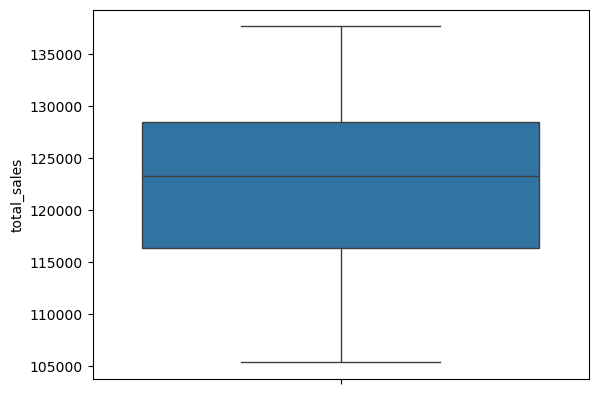

In [332]:
#seaborn box-whisker plot to ***check outliers***


sns.boxplot(monthly_data['total_sales'])
plt.show()

In [333]:
monthly_data

,yearmonth,total_sales,avg_sales
0,2024-01-01,120610.54,20101.756667
1,2024-02-01,137668.91,22944.818333
2,2024-03-01,124262.86,20710.476667
3,2024-04-01,114108.88,19018.146667
4,2024-05-01,133492.09,22248.681667
5,2024-06-01,122240.54,20373.423333
6,2024-07-01,130500.39,21750.065000
7,2024-08-01,117040.08,19506.680000
8,2024-09-01,114227.20,19037.866667
9,2024-10-01,105380.19,17563.365000


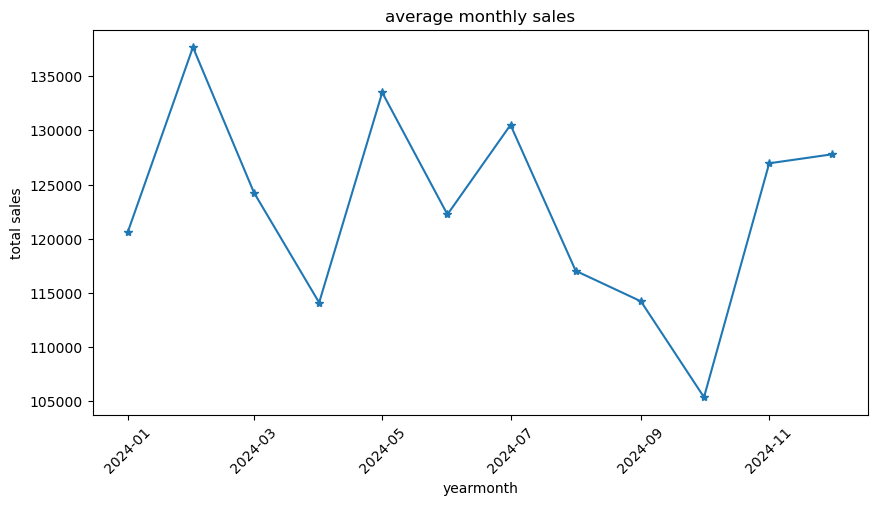

In [346]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_data["yearmonth"],monthly_data["total_sales"],marker="*")
plt.title("average monthly sales")
plt.xlabel("yearmonth")
plt.ylabel("total sales")
plt.xticks(rotation=45)
plt.show()

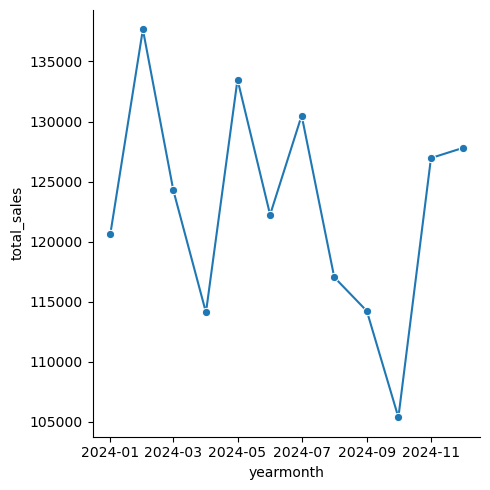

In [347]:
sns.relplot(data=monthly_data,x="yearmonth",y="total_sales",kind="line",marker="o")
plt.show()

In [348]:
df.columns

Index(['Date', 'Store_ID', 'Department', 'Sales', 'Holiday_Flag', 'yearmonth'], dtype='object')

In [349]:
sales_dep=df.groupby('Department')['Sales'].agg(total_sales='sum').reset_index()
sales_dep.sort_values(by="total_sales",ascending=False).reset_index(drop=True)

,Department,total_sales
0,Electronics,928451.29
1,Groceries,803408.83
2,Toys,754365.59
3,Clothing,630687.82
4,Pharmacy,470274.19


In [351]:
sales_dep

,Department,total_sales
0,Clothing,630687.82
1,Electronics,928451.29
2,Groceries,803408.83
3,Pharmacy,470274.19
4,Toys,754365.59


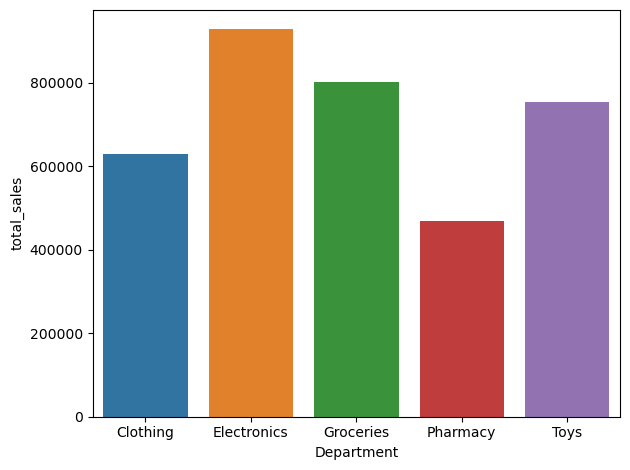

In [352]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figure=(4,6))
sns.barplot(data=sales_dep,x='Department',y='total_sales',hue="Department")
plt.tight_layout()
plt.show()

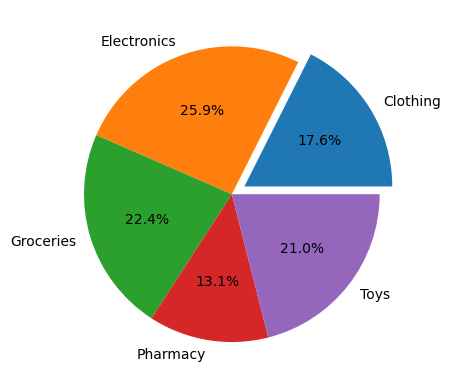

In [357]:
plt.pie(sales_dep["total_sales"],labels=sales_dep["Department"],autopct="%0.1f%%",explode=[0.1,0,0,0,0])
plt.show()

In [358]:
# grouped by store id and applied aggregate function std.dev 

sales_stores=df.groupby('Store_ID')['Sales'].agg(variance="var",total_sales="sum").reset_index()
sales_stores

,Store_ID,variance,total_sales
0,1,2.477387e+07,760805.48
1,2,2.591501e+07,636093.53
2,3,3.029029e+07,649940.63
3,4,3.724882e+07,934166.98
4,5,2.654164e+07,606181.10


In [360]:
#min deviation/ min dispersion

sales_stores["variance"].min()

24773874.73404381

In [363]:
sales_stores.describe()

,Store_ID,variance,total_sales
count,5.000000,5.000000e+00,5.000000
mean,3.000000,2.895393e+07,717437.544000
std,1.581139,5.077354e+06,134539.125022
min,1.000000,2.477387e+07,606181.100000
25%,2.000000,2.591501e+07,636093.530000
50%,3.000000,2.654164e+07,649940.630000
75%,4.000000,3.029029e+07,760805.480000
max,5.000000,3.724882e+07,934166.980000


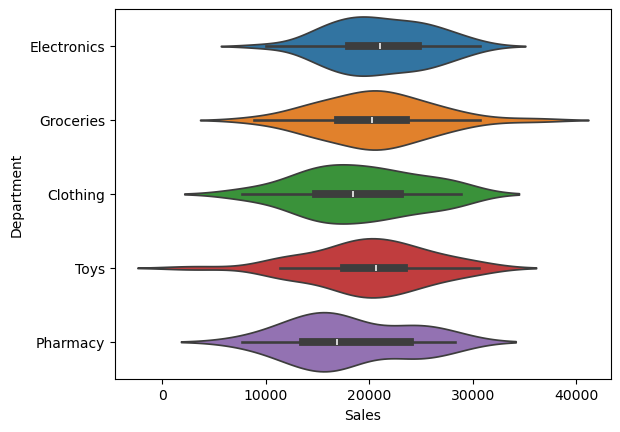

In [366]:
sns.violinplot(data=df,x="Sales",y="Department",hue="Department")	    #opposite to bar plot
plt.show()

In [367]:
c_m=df[["Store_ID","Sales"]].corr()   # c_m--correlation matrix
c_m

,Store_ID,Sales
Store_ID,1.000000,-0.065959
Sales,-0.065959,1.000000


In [370]:
df.columns

Index(['Date', 'Store_ID', 'Department', 'Sales', 'Holiday_Flag', 'yearmonth'], dtype='object')

In [372]:
cm=pd.crosstab(df["Department"],df["Store_ID"])

 heatmap: 2d correlation b/w 2 continuous(numeric variables)
 -

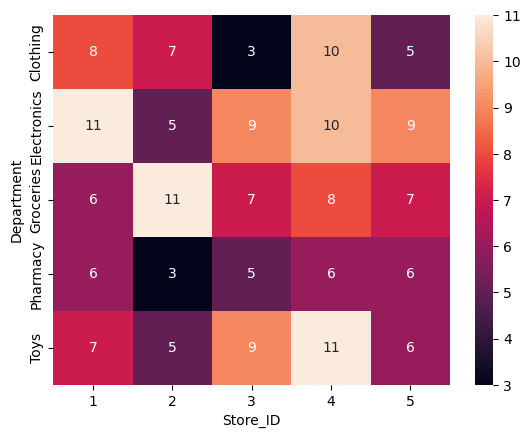

In [375]:
sns.heatmap(cm,annot=True)    # cm--correlation matrix,  annot=True -- shows values in the colours  
plt.show()   

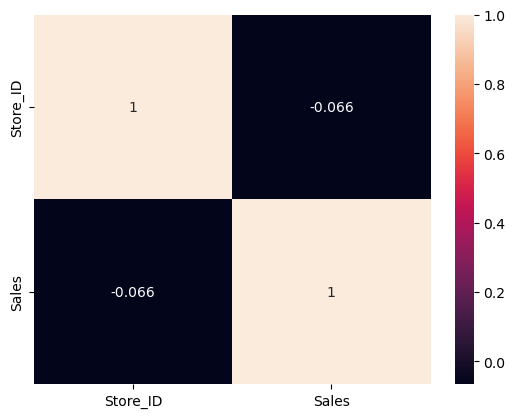

In [54]:
sns.heatmap(c_m,annot=True)    # annot shows values in the colours
plt.show()

# Q2) E-Commerce Scenario
Company: Amazon

Topic: Product Reviews Analysis
Question:

Amazon wants to analyze customer feedback for its electronics products. Given a dataset with Product_ID, Rating, Review_Text, Review_Date, use Pandas and basic Python to:

Calculate average rating per product.

Identify the top 5 products with the most reviews.

Use NumPy to calculate the standard deviation of ratings.

What statistical measure would help detect whether most ratings are skewed (positively or negatively)?

In [56]:
df=pd.read_csv(r"C:\Users\91709\OneDrive\Pictures\Desktop\ecommerce_reviews_data.csv")
df

,Product_ID,Rating,Review_Text,Review_Date
0,P0016,4,Very bad quality,19-05-2024
1,P0008,5,Good value for money,03-02-2024
2,P0013,3,Good value for money,28-03-2024
3,P0001,5,Excellent product,26-02-2024
4,P0016,5,Poor packaging,19-02-2024
...,...,...,...,...
195,P0017,3,Highly satisfied,24-04-2024
196,P0014,3,Highly satisfied,28-04-2024
197,P0015,1,Excellent product,11-02-2024
198,P0001,5,Very bad quality,02-02-2024


### Calculate average rating per product.

In [58]:
df.columns=df.columns.str.strip().tolist()  # safely convert column name to str and remove leading and trailing
df.columns

Index(['Product_ID', 'Rating', 'Review_Text', 'Review_Date'], dtype='object')

In [59]:
product_rating=df.groupby('Product_ID')['Rating'].agg(avg_product_rating='mean').reset_index()
product_rating

,Product_ID,avg_product_rating
0,P0001,3.090909
1,P0002,3.600000
2,P0003,3.307692
3,P0004,2.583333
4,P0005,2.800000
5,P0006,2.400000
6,P0007,3.083333
7,P0008,2.666667
8,P0009,2.888889
9,P0010,3.333333


### Identify the top 5 products with the most reviews.

In [61]:

top5_rating=df.groupby('Product_ID')['Rating'].agg(product_rating='count').reset_index()
top5_rating.sort_values(by='product_rating',ascending=False).head().reset_index(drop=True)

,Product_ID,product_rating
0,P0005,15
1,P0013,15
2,P0012,14
3,P0003,13
4,P0017,13


### Use NumPy to calculate the standard deviation of ratings.

In [63]:
#using NumPy
arr=np.array(df["Rating"])            
np.std(arr)                      # arr=np.std(df["Rating"])


1.4142135623730951

***Why x = df5["Delivery_Time"] doesn't need to be converted to an array?***

Because:

df5["Delivery_Time"] is a Pandas Series.

***And Pandas Series supports NumPy operations directly — like np.mean(), subtraction, division, np.abs(), etc.***


Under the hood, it behaves like a NumPy array because it's built on top of it.

In [65]:
#using pandas 
top5_rating=df.groupby('Product_ID')['Rating'].agg(standard_dev__rating='std').reset_index()  
top5_rating

,Product_ID,standard_dev__rating
0,P0001,1.868397
1,P0002,0.894427
2,P0003,1.315587
3,P0004,1.729862
4,P0005,1.146423
5,P0006,1.341641
6,P0007,1.311372
7,P0008,1.632993
8,P0009,1.615893
9,P0010,1.658312


In [66]:
df['Rating'].std()


1.4177624100166717

In [67]:
df['Rating'].skew()   # value< 0 (negative)	Left-skewed (tail on left side)

-0.07480844837701606

Analyzing customer ratings (e.g., on a 1–5 scale), skewness will tell us whether:

Most people gave low ratings (→ positive skew),  ---   tail on right>>high outliers

Most gave high ratings (→ negative skew),       ----    tail on left >>low outliers

Or ratings are evenly spread (→ symmetric).      ----    no outliers

***Q3)🔹 Finance Company Scenario***
Company: JPMorgan Chase
Topic: Customer Transactions
Question:

Analyze customer transactions. Given columns Customer_ID, Transaction_Date, Amount, Category, write code to:

Compute the total spend per customer using Pandas.

Use NumPy to find the percentile (25th, 50th, 75th) of all transaction amounts.

Use basic Python to count how many customers have more than 10 transactions.

Perform a statistical test to see if the average transaction amount differs between two categories.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv(r"C:\Users\91709\OneDrive\Pictures\Desktop\finance_transactions_data.csv")
df

,Customer_ID,Transaction_Date,Amount,Category
0,CUST021,20-01-2024,56.93,Dining
1,CUST032,31-03-2024,311.01,Groceries
2,CUST023,20-05-2024,141.67,Dining
3,CUST033,07-01-2024,101.29,Entertainment
4,CUST003,06-03-2024,26.96,Travel
...,...,...,...,...
245,CUST019,06-05-2024,273.55,Dining
246,CUST047,24-05-2024,65.89,Utilities
247,CUST016,22-05-2024,350.08,Travel
248,CUST005,12-06-2024,341.37,Travel


In [71]:
df.shape

(250, 4)

In [72]:
df.columns=df.columns.str.strip()
df.columns

Index(['Customer_ID', 'Transaction_Date', 'Amount', 'Category'], dtype='object')

In [73]:
df.isnull().sum()

Customer_ID         0
Transaction_Date    0
Amount              0
Category            0
dtype: int64

In [74]:
df.duplicated().sum()

0

In [75]:
df["Customer_ID"].value_counts().reset_index().head()

,Customer_ID,count
0,CUST026,10
1,CUST012,10
2,CUST023,9
3,CUST032,9
4,CUST035,8


Compute the total spend per customer using Pandas.
-

In [77]:
cst_total_spent=df.groupby("Customer_ID")["Amount"].agg(total_spent="sum").reset_index()
cst_total_spent.sort_values(by="total_spent",ascending=False).reset_index(drop=True).head()

,Customer_ID,total_spent
0,CUST016,1344.55
1,CUST032,1286.52
2,CUST005,1247.52
3,CUST026,1212.55
4,CUST028,835.00


Use NumPy to find the percentile (25th, 50th, 75th) of all transaction amounts.
-

In [79]:
cst_total_spent.describe()   #using pandas 

,total_spent
count,49.000000
mean,545.844898
std,312.542801
min,52.210000
25%,315.060000
50%,555.940000
75%,705.500000
max,1344.550000


In [80]:
arr=np.array(cst_total_spent["total_spent"])    # using NumPy
arr

array([ 404.17,  705.5 ,  226.78,  352.68, 1247.52,   52.21,  680.55,
        315.06,  716.24,  355.15,   52.96,  699.86,  555.94,  276.38,
        216.9 , 1344.55,  744.81,  116.53,  731.89,  432.48,  299.78,
        698.72,  753.36,  668.81,  640.  , 1212.55,   82.13,  835.  ,
        647.67,  482.72,  579.09, 1286.52,  610.68,  629.47,  820.04,
        674.18,  782.62,  390.95,  347.91,   73.05,  453.85,  234.73,
        271.56,  405.2 ,  507.48,  425.15,  252.11,  689.02,  763.89])

In [81]:
percentile_25=np.percentile(arr,25)
print("25% transaction:",percentile_25)
percentile_50=np.percentile(arr,50)
print("50% transaction:",percentile_50)
percentile_75=np.percentile(arr,75)
print("75% transaction:",percentile_75)

25% transaction: 315.06
50% transaction: 555.94
75% transaction: 705.5


Use basic Python to count how many customers have more than 10 transactions.
-

In [83]:
cst_total_spents=df.groupby("Customer_ID")["Customer_ID"].agg(repeat_cst="count").reset_index()
above_10t=cst_total_spents[cst_total_spents["repeat_cst"]>10]
above_10t

,Customer_ID,repeat_cst


here there are no customers made above 10 transactions 

Perform a statistical test to see if the average transaction amount differs between two categories.
-

In [86]:
df["Category"].unique()

array(['Dining', 'Groceries', 'Entertainment', 'Travel', 'Utilities'],
      dtype=object)

In [87]:
monthly_expenses=df.groupby('Category')["Amount"].agg(avg_tran="mean").reset_index()
monthly_expenses

,Category,avg_tran
0,Dining,98.983409
1,Entertainment,107.936667
2,Groceries,109.894082
3,Travel,112.196935
4,Utilities,103.859200


so the monthly expenses is high on groceries and low on Dining


***Q4)🔹 Healthcare Company Scenario***
Company: CVS Health
Topic: Patient Visit Logs
Question:

Analyze patient visit logs from a clinic. Data columns: Patient_ID, Visit_Date, Diagnosis, Cost, Follow_Up.
Tasks:

Calculate average and median cost per diagnosis.

Use NumPy to determine if the distribution of costs is normal.

Find the diagnosis with the highest variability in cost.

Create a time series of monthly visits.

In [90]:
df4=pd.read_csv(r"C:\Users\91709\OneDrive\Pictures\Desktop\healthcare_visit_logs.csv")
df4

,Patient_ID,Visit_Date,Diagnosis,Cost,Follow_Up
0,PAT0002,30-01-2024,Flu,174.84,Yes
1,PAT0026,01-04-2024,Hypertension,143.09,Yes
2,PAT0017,17-06-2024,Flu,182.38,Yes
3,PAT0040,30-03-2024,Asthma,226.15,Yes
4,PAT0033,05-06-2024,Flu,138.29,No
...,...,...,...,...,...
195,PAT0032,26-05-2024,Hypertension,169.27,No
196,PAT0037,07-06-2024,Hypertension,105.81,Yes
197,PAT0012,26-05-2024,Flu,157.69,Yes
198,PAT0049,21-04-2024,Allergy,152.91,No


In [91]:
df4.columns  # names of the columns

Index(['Patient_ID', 'Visit_Date', 'Diagnosis', 'Cost', 'Follow_Up'], dtype='object')

In [92]:
df4.dtypes  # data types of each column

Patient_ID     object
Visit_Date     object
Diagnosis      object
Cost          float64
Follow_Up      object
dtype: object

In [93]:
df.duplicated().sum()    #no duplicate records   

0

In [94]:
df4.isnull().sum()   #no missing values   np.nan

Patient_ID    0
Visit_Date    0
Diagnosis     0
Cost          0
Follow_Up     0
dtype: int64

Calculate average and median cost per diagnosis.
-

In [96]:
df4.columns

Index(['Patient_ID', 'Visit_Date', 'Diagnosis', 'Cost', 'Follow_Up'], dtype='object')

In [97]:
cost_dia=df4.groupby("Diagnosis")["Cost"].agg(avg_cost="mean",median_cost="median").reset_index()
cost_dia.sort_values(by="avg_cost")

,Diagnosis,avg_cost,median_cost
5,Hypertension,138.891379,126.970
4,Flu,143.325000,146.320
3,Diabetes,148.628214,157.695
0,Allergy,150.441190,149.455
2,Covid-19,152.125556,154.785
1,Asthma,154.163704,158.660


Use NumPy to determine if the distribution of costs is normal.
-

In [99]:
#using pandas 
df4["Cost"].skew()   #distribution of costs is (normal range: -1<skewness<1)

0.13573045373005138

In [100]:
Cost=np.array(df4["Cost"])

from scipy.stats import normaltest

stat, p = normaltest(Cost)
print("D'Agostino and Pearson Test:")
print("Test Statistic:", stat)
print("p-value:", p)

if p > 0.05:  # default(alpha=0.05)
    print("✅ Data appears to be normal.")
else:
    print("❌ Data is likely not normal.")


D'Agostino and Pearson Test:
Test Statistic: 0.6897596658288037
p-value: 0.7083054633572388
✅ Data appears to be normal.


Find the diagnosis with the highest variability in cost.
-

In [102]:
highvar_dia=df4.groupby("Diagnosis")["Cost"].agg(high_cost_var="var").reset_index()
highvar_dia

,Diagnosis,high_cost_var
0,Allergy,2127.469616
1,Asthma,2233.783986
2,Covid-19,2468.948048
3,Diabetes,1998.204867
4,Flu,2819.833864
5,Hypertension,1279.320412


Create a time series of monthly visits.
-

In [104]:
df4["Visit_Date"]=pd.to_datetime(df4["Visit_Date"],errors="coerce")
df4["yearmonth"]=df4["Visit_Date"].dt.to_period('M')
monthly_data=df4.groupby("yearmonth").size().reset_index(name="visits") #yearmonth col in period
monthly_data["yearmonth"]=monthly_data["yearmonth"].dt.to_timestamp() # convert period to timestamp for ploting 

C:\Users\91709\AppData\Local\Temp\ipykernel_13676\1694610089.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df4["Visit_Date"]=pd.to_datetime(df4["Visit_Date"],errors="coerce")


In [105]:
monthly_data

,yearmonth,visits
0,2024-01-01,40
1,2024-02-01,21
2,2024-03-01,29
3,2024-04-01,40
4,2024-05-01,28
5,2024-06-01,42


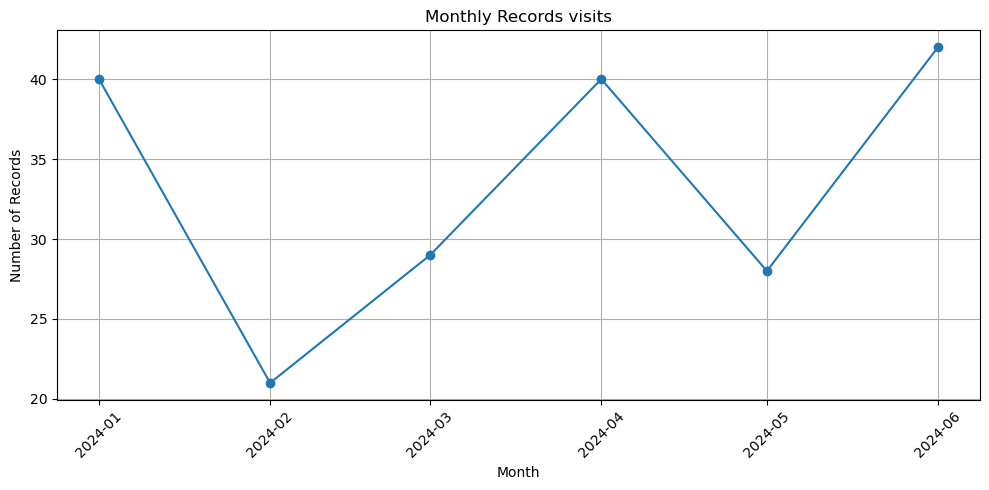

In [106]:

# Step 8: Plot the result
plt.figure(figsize=(10, 5))
plt.plot(monthly_data['yearmonth'],monthly_data['visits'], marker='o', linestyle='-')     
plt.title('Monthly Records visits')
plt.xlabel('Month')
plt.ylabel('Number of Records')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


***Q5)🔹 Food Delivery Company Scenario***
Company: Zomato
Topic: Order and Rating Analysis
Question:

Zomato wants insights from their order data. Data includes Order_ID, Restaurant_ID, Delivery_Time, Order_Value, Rating.
Tasks:

Calculate the average delivery time per restaurant.

Use Pandas to find the correlation between delivery time and rating.

Use NumPy to calculate z-scores for delivery times and identify outliers.

What statistical metric would help you judge customer satisfaction best?

In [108]:
df5=pd.read_excel(r"C:\Users\91709\OneDrive\Pictures\Desktop\zomato_order_data.xlsx")
df5

,Order_ID,Restaurant_ID,Delivery_Time,Order_Value,Rating
0,O1000,R7,25.52,808,4
1,O1001,R4,29.44,965,5
2,O1002,R8,37.34,357,1
3,O1003,R5,24.38,280,2
4,O1004,R7,34.75,553,4
...,...,...,...,...,...
95,O1095,R10,30.59,472,3
96,O1096,R9,35.00,277,4
97,O1097,R7,30.76,167,4
98,O1098,R9,26.99,942,5


In [109]:
df5.columns=df5.columns.str.strip()
df5.columns

Index(['Order_ID', 'Restaurant_ID', 'Delivery_Time', 'Order_Value', 'Rating'], dtype='object')

In [110]:
df5.dtypes

Order_ID          object
Restaurant_ID     object
Delivery_Time    float64
Order_Value        int64
Rating             int64
dtype: object

In [111]:
df5.isnull().sum()

Order_ID         0
Restaurant_ID    0
Delivery_Time    0
Order_Value      0
Rating           0
dtype: int64

In [112]:
df5.duplicated().sum()

0

Calculate the average delivery time per restaurant.
-


In [114]:
dly_time=df5.groupby("Restaurant_ID")["Delivery_Time"].agg(avg_dt="mean").reset_index()
dly_time.sort_values(by="avg_dt").reset_index(drop=True) #.reset_index(drop=True)>> drop=True: removes the old index and resets it to 0, 1, 2...


,Restaurant_ID,avg_dt
0,R7,28.283636
1,R4,28.548889
2,R10,28.613636
3,R1,28.827143
4,R5,29.147000
5,R2,29.627000
6,R8,30.218667
7,R3,30.965556
8,R9,32.451667
9,R6,36.583333


In [115]:
dly_time.describe()

,avg_dt
count,10.000000
mean,30.326653
std,2.549074
min,28.283636
25%,28.667013
50%,29.387000
75%,30.778833
max,36.583333


Use Pandas to find the correlation between delivery time and rating.
-

In [117]:
df5["Delivery_Time"].corr(df5["Rating"])

-0.005562658449317781

Close to +1: Strong positive correlation (longer delivery → higher ratings).

Close to -1: Strong negative correlation (longer delivery → lower ratings).

Close to 0: Little or no linear relationship.

Use NumPy to calculate z-scores for delivery times and identify outliers.
-

In [120]:
mean=np.mean(df5["Delivery_Time"])
std=np.std(df5["Delivery_Time"])
x=df5["Delivery_Time"] 
z_scores=(x-mean)/std

df5["z_score_dt"] = z_scores

# Step 4: Identify outliers (commonly z < -3 or z > 3)
outliers = df5[np.abs(df5["z_score_dt"]) > 2]   
#np.abs(...)  
#np.abs() takes the absolute value of the z-scores.,
#This is because outliers can be either too high (> +3) or too low (< -3), so we treat both sides the same.

# View the outliers
print(outliers)


   Order_ID Restaurant_ID  Delivery_Time  Order_Value  Rating  z_score_dt
18    O1018            R6          43.17          659       1    2.601888
23    O1023            R6          41.44          855       1    2.256638
43    O1043            R9          44.72          619       4    2.911216


A new DataFrame outliers containing only those rows where the delivery time is an outlier based on the z-score threshold of 2.

What statistical metric would help you judge customer satisfaction best?
-